<a href="https://colab.research.google.com/github/Quickmoves11/Infosys_Stroke-Patient-Healthcare-Using-Deep-Learning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke-Patient-Healthcare-Using-Deep-Learning**

**<ins>Dataset Description:</ins>**       
This dataset contains critical information such as medical history, lifestyle choices, and health metrics. It includes features like gender, age, hypertension status, heart disease status, marital status, work type, residence type, average glucose level, body mass index (BMI), and smoking status. The dataset serves as a valuable resource for understanding the relationships between these variables and stroke incidence, facilitating research and predictive modeling in healthcare.

**<ins>Dataset:</ins>**  
The dataset provided consists of patient records aimed at analyzing stroke occurrences and related factors:
* **id:** Unique identifier for each patient
* **gender:** Gender of the patient (Male/Female)
* **age:** Age of the patient
* **hypertension:** Hypertension status (0: No, 1: Yes)
* **heart_disease:** Heart disease status (0: No, 1: Yes)
* **ever_married:** Marital status (Yes/No)
* **work_type:** Type of work (e.g., Private, Self-employed)
* **Residence_type:** Type of residence (Urban/Rural)
* **avg_glucose_level:** Average glucose level in the patient's blood
* **bmi:** Body Mass Index of the patient
* **smoking_status:** Smoking status (e.g., formerly smoked, never smoked)
* **stroke:** Stroke occurrence status (1: Yes, 0: No)

# **Import libraries**

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#**Load the Stroke Dataset file** (healthcare-dataset-stroke-data.csv)

In [273]:
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")

# **Defining Problem Statement and Analyzing Basic Information**
***

In this section, we will define the problem statement and analyze the basic metrics of the healthcare stroke dataset to understand its structure and characteristics:

1. **Shape of the Dataset:**
   - Provides the number of rows and columns, giving insight into the dataset's size.

2. **Data Information:**
   - Using the `info()` function to display data types and the count of non-null entries, which helps identify potential issues with missing values and data types.

3. **Describe:**
   - Utilizing the `describe()` function to summarize numerical features of the dataset, providing insights into central tendency, dispersion, and shape of the dataset’s distribution.

####Shape of the dataset

In [274]:
df.shape

(5110, 12)

#### Data types and info

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Describe

In [276]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# **Analyzing Unique Values and Null Values**
***

In this section, we will analyze the unique values, null values, and their percentages within the healthcare stroke dataset:

1. **Finding Unique Values:**
   - Identifying unique values in each column to understand the variability and quality of categorical data, which can help spot potential data entry issues.

2. **Finding Null Values:**
   - Counting the number of null values in each column to assess the completeness of the dataset. This step is crucial for understanding which features may require imputation or further cleaning.

3. **Calculating Percentage of Null Values:**
   - Computing the percentage of null values for each column relative to the total number of entries. This metric helps prioritize which columns may need attention based on the extent of missing data.

This analysis is essential for ensuring data quality and informing subsequent preprocessing steps.

#### Unique values in each column

In [277]:
unique_values = {column: df[column].unique() for column in df.columns}
print("\nUnique Values in Each Column:")
for column, values in unique_values.items():
    print(f"{column}: {values[:10]}")  # Show only first 10 unique values


Unique Values in Each Column:
id: [ 9046 51676 31112 60182  1665 56669 53882 10434 27419 60491]
gender: ['Male' 'Female' 'Other']
age: [67. 61. 80. 49. 79. 81. 74. 69. 59. 78.]
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
avg_glucose_level: [228.69 202.21 105.92 171.23 174.12 186.21  70.09  94.39  76.15  58.57]
bmi: [36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7]
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


####Null Values in Each Column

In [278]:
null_values = df.isnull().sum()
null_values

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


####Percentage of Null Values in Each Column

In [279]:

percentage_nulls = (null_values / len(df)) * 100
percentage_nulls

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


# **Handling Null Values**
***

In this section, we will outline the approach for dealing with null values in the healthcare stroke dataset:

   - First, we will identify columns with null values and assess their frequency to understand the extent of missing data.

   - For numerical columns, we will use the **median** to fill null values. The median is robust to outliers and provides a better measure of central tendency when the data is skewed.

   - After imputation, we will check for any remaining null values to ensure that all missing data has been addressed.

   -In simple Terms in This We will add Median Value of that Column in the Null Cell


In [280]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

print("\nResults After Dealing with Null Value")
df.isnull().sum()


Results After Dealing with Null Value


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


# **General Task(Data Visualization)**
***

1. Frame your questions
   
2. Plot the graph required. (Min 5 graphs)

3. Make observations.



#### Framed Question are:
***
 1. What is the distribution of age in stroke cases?
 2. How does average glucose level vary with stroke cases?
 3. How does BMI vary between stroke and non-stroke cases?
 4. What is the stroke count by residence type?
 5. What is the stroke count by work type?

#### **1.What is the distribution of age in stroke cases?**
Age Distribution with Stroke Cases

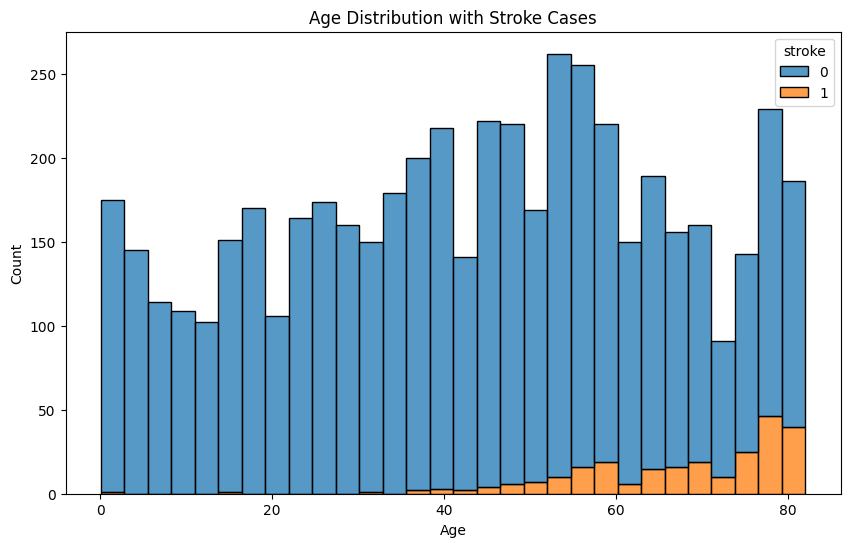

In [281]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', bins=30)
plt.title('Age Distribution with Stroke Cases')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### **Observations for Age Distribution with Stroke Cases:**
Stroke cases are more common among older age groups.

#### **2. How does average glucose level vary with stroke cases?**
Average Glucose Level Distribution by Stroke Status

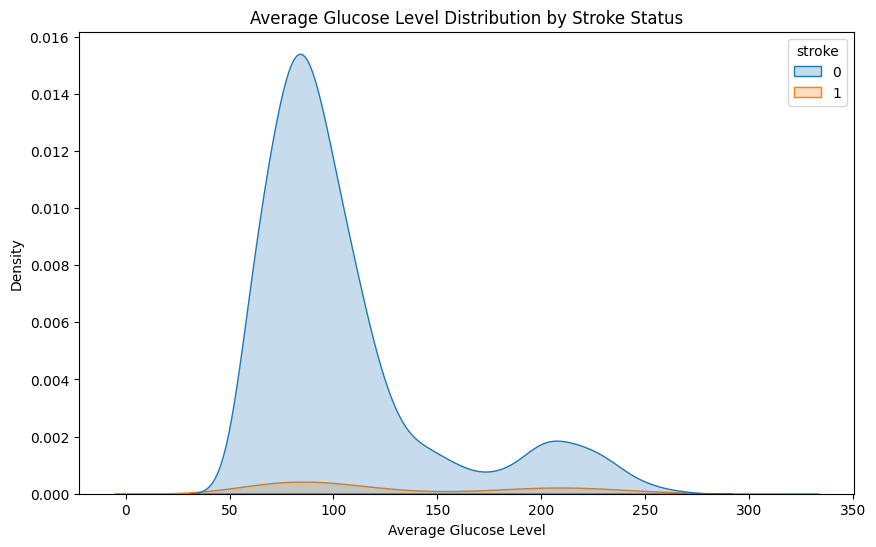

In [282]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True)
plt.title('Average Glucose Level Distribution by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

#### **Observations for Average Glucose Level Distribution by Stroke Status:**
Higher average glucose levels are more associated with stroke cases.

#### **3. How does BMI vary between stroke and non-stroke cases?**
BMI Distribution with Stroke Cases

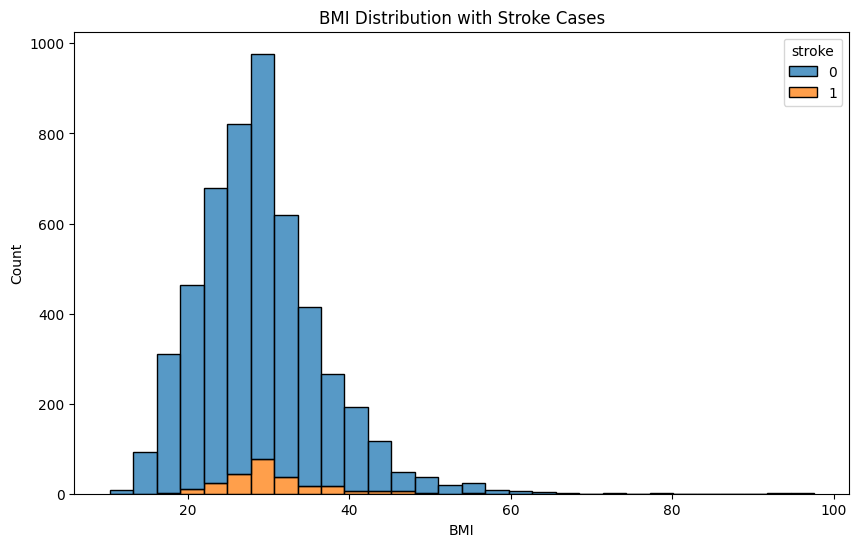

In [283]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', multiple='stack', bins=30)
plt.title('BMI Distribution with Stroke Cases')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

#### **Observations for BMI Distribution with Stroke Cases:**
There is a variation in BMI between stroke and non-stroke cases.

#### **4. What is the stroke count by residence type?**
Stroke Count by Residence Type

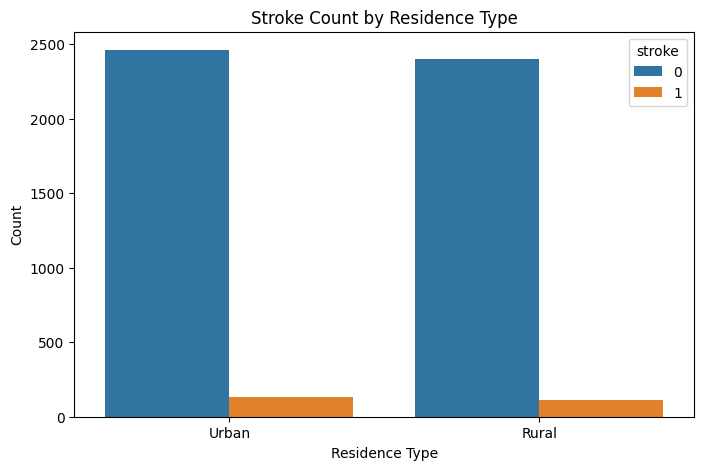

In [284]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Residence_type', hue='stroke')
plt.title('Stroke Count by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

#### **Observations for Stroke Count by Residence Type:**
There is a difference in stroke counts based on residence type.

####  **What is the stroke count by work type?**
 Stroke Count by Work Type

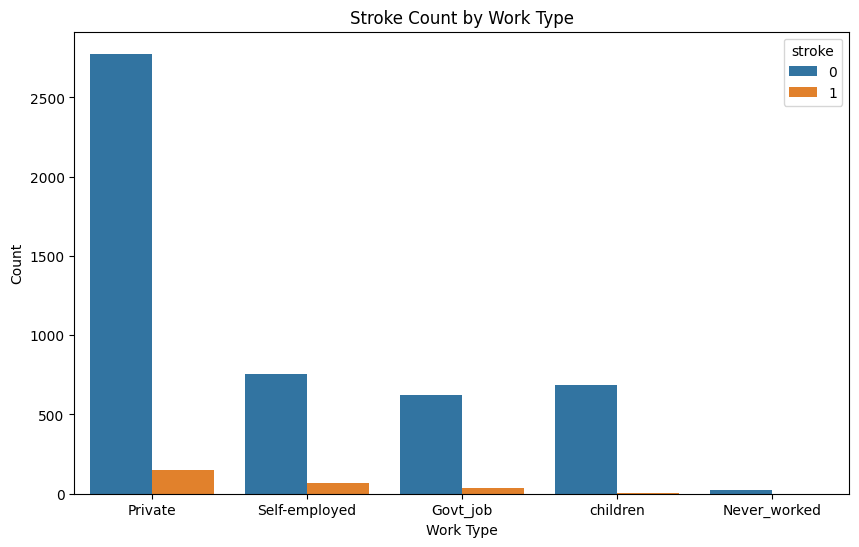

In [285]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Stroke Count by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()


#### **Observations for Stroke Count by Work Type:**
Certain work types (like 'Private') have a higher count of stroke cases.

# **Specific Task(Data encoding)**
***



#### **1. Convert 'Residence_type' column to binary (0 = Rural, 1 = Urban)**

In [286]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

#### **2. Convert 'work_type' column to binary columns**

In [287]:
df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)

#### **3. Convert 'smoking_status' column to binary columns**

In [288]:
df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

#### **4. All these columns should only have values 0 or 1**

In [289]:
print(df['Urban/Rural'].unique())
print(df['work_type_Never_worked'].unique())
print(df['work_type_Private'].unique())
print(df['work_type_Self_employed'].unique())
print(df['smoking_status_formerly_smoked'].unique())
print(df['smoking_status_never_smoked'].unique())
print(df['smoking_status_smokes'].unique())


[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]


#### **5. Create a new variable to store the dataset for data model**
Drop original categorical columns that were encoded



In [290]:
df_model = df.drop(['Residence_type', 'work_type', 'smoking_status','gender', 'ever_married'], axis=1)


#### Save the encoded dataset to a new CSV file for model building

In [291]:
df_model.to_csv('df_model.csv', index=False)

#### Print the final transformed dataset to verify

In [292]:
# Print the final transformed dataset to verify
df_model.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,1,0,1,0


#### Define features (X) and target (y)

In [293]:
X = df_model.drop('stroke', axis=1)  # independent variables
y = df_model['stroke']  # dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
802,4970,79.00,0,0,112.64,28.5,0,0,0,1,1,0,0
3927,56137,62.00,0,0,88.32,36.3,1,0,1,0,0,0,0
2337,54590,21.00,0,0,59.52,33.7,0,0,1,0,0,1,0
3910,36548,31.00,0,0,65.70,30.4,1,0,0,0,1,0,0
1886,61171,31.00,0,0,59.63,19.9,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,88.00,30.6,0,0,0,0,0,1,0
466,1307,61.00,1,0,170.05,60.2,0,0,1,0,0,0,1
3092,31481,1.16,0,0,97.28,17.8,1,0,0,0,0,0,0
3772,61827,80.00,0,0,196.08,31.0,0,0,0,1,1,0,0


# **Basic Machine Learning Models**

- Linear Regression
- Lasso Regression
- Ridge Regression
- Logistic Regression


# Root Mean Square error values (RMSE)

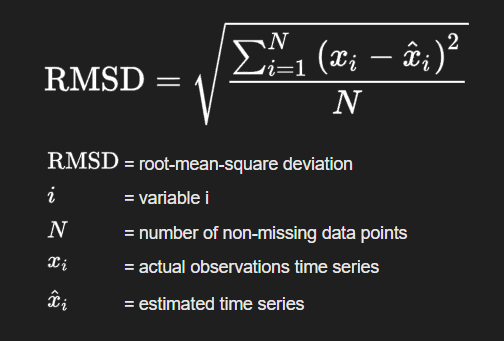

#### Linear Regression Model

In [294]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)  # Train the model
linear_reg_predictions = linear_reg.predict(X_test)  # Predict on test data
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))  # Calculate RMSE
linear_reg_rmse = linear_reg_rmse * 100  # RMSE in percentage
linear_reg_rmse

22.755066866209976

#### Lasso Regression Model

In [295]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse = lasso_reg_rmse * 100
lasso_reg_rmse

23.758795130268975

#### Ridge Regression Model

In [296]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)
ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_predictions))
ridge_reg_rmse = ridge_reg_rmse * 100
ridge_reg_rmse

22.75523711818867

#### Logistic Regression Model

In [297]:
class CusLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return np.array(class_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.sum(y == y_pred) / len(y)
        return accuracy


In [298]:
clf=CusLogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse=Log_reg_rmse*100
Log_reg_rmse

24.630339428279314

#**Comparing the models based on RMSE and Accuracy**

In [299]:
#Accuracy of each Model
linear_reg_accuracy =linear_reg.score(X_test, y_test)*100
lasso_reg_accuracy =lasso_reg.score(X_test, y_test)*100
ridge_reg_accuracy =ridge_reg.score(X_test, y_test)*100
log_reg_accuracy = clf.score(X_test, y_test)*100

In [300]:
# Logistic Regression accuracy is in percentage, as it's a classification task
print(f"Linear Regression Accuracy (R² score): {linear_reg_accuracy:.2f}%")
print(f"Lasso Regression Accuracy (R² score): {lasso_reg_accuracy:.2f}%")
print(f"Ridge Regression Accuracy (R² score): {ridge_reg_accuracy:.2f}%")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}%")# Accuracy for Logistic Regression

Linear Regression Accuracy (R² score): 9.14%
Lasso Regression Accuracy (R² score): 0.94%
Ridge Regression Accuracy (R² score): 9.13%
Logistic Regression Accuracy: 93.93%


#**Visualizations**

#### Plotting RMSE values

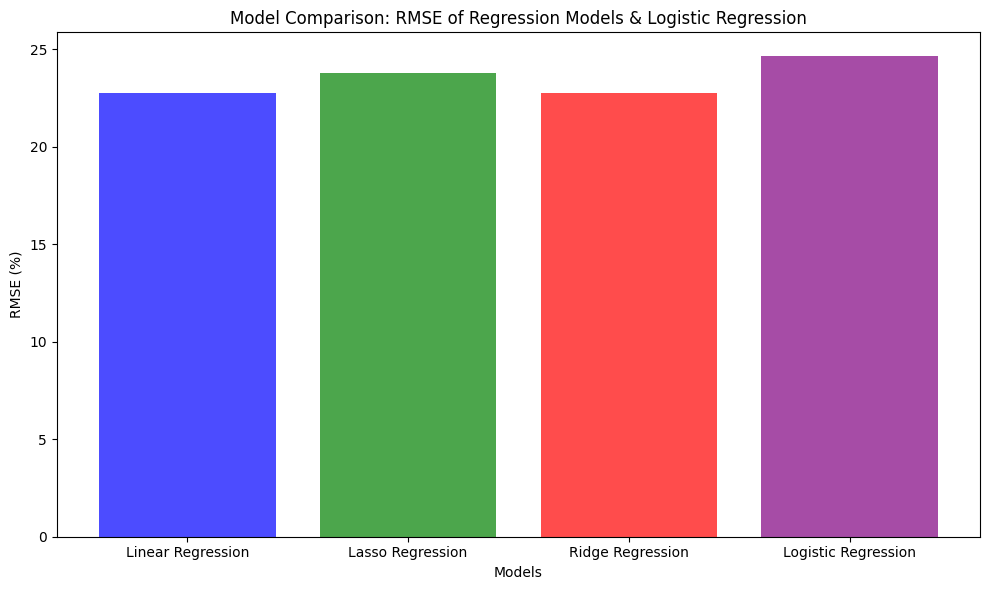

In [301]:

models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression']
rmse_values = [linear_reg_rmse, lasso_reg_rmse, ridge_reg_rmse, Log_reg_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'], alpha=0.7)
# Adding titles and labels
plt.title('Model Comparison: RMSE of Regression Models & Logistic Regression')
plt.ylabel('RMSE (%)')
plt.xlabel('Models')

# Displaying the plot
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

####Plotting Accuracy

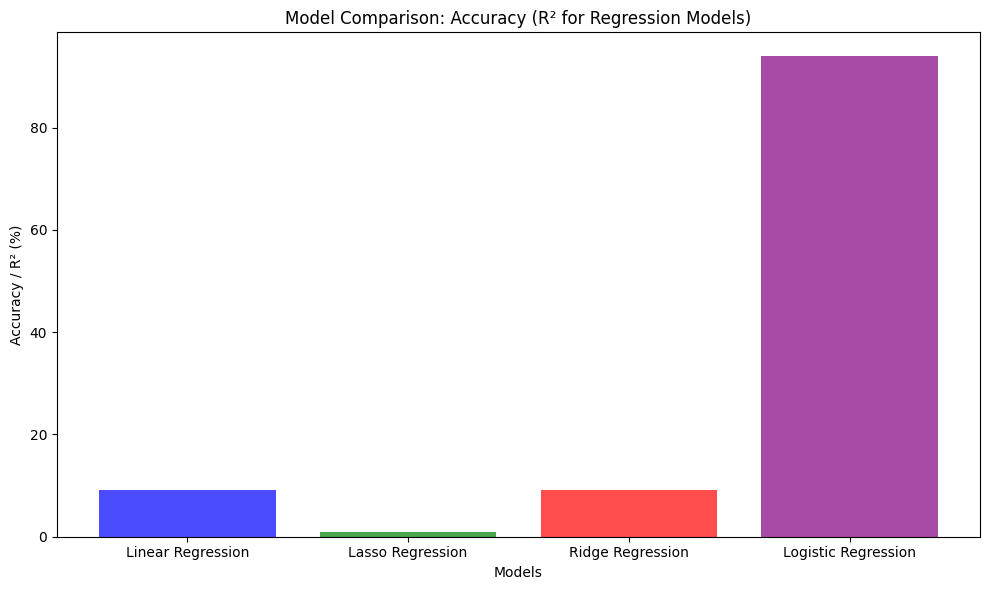

In [302]:

# Model names and accuracy
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression']
accuracies = [linear_reg_accuracy, lasso_reg_accuracy, ridge_reg_accuracy, log_reg_accuracy]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'], alpha=0.7)

# Adding titles and labels
plt.title('Model Comparison: Accuracy (R² for Regression Models)')
plt.ylabel('Accuracy / R² (%)')
plt.xlabel('Models')

# Display the plot
plt.tight_layout()  # Adjust layout for better visualization
plt.show()



#### Visualizing Predictions of Logistic Regression and Linear Regression

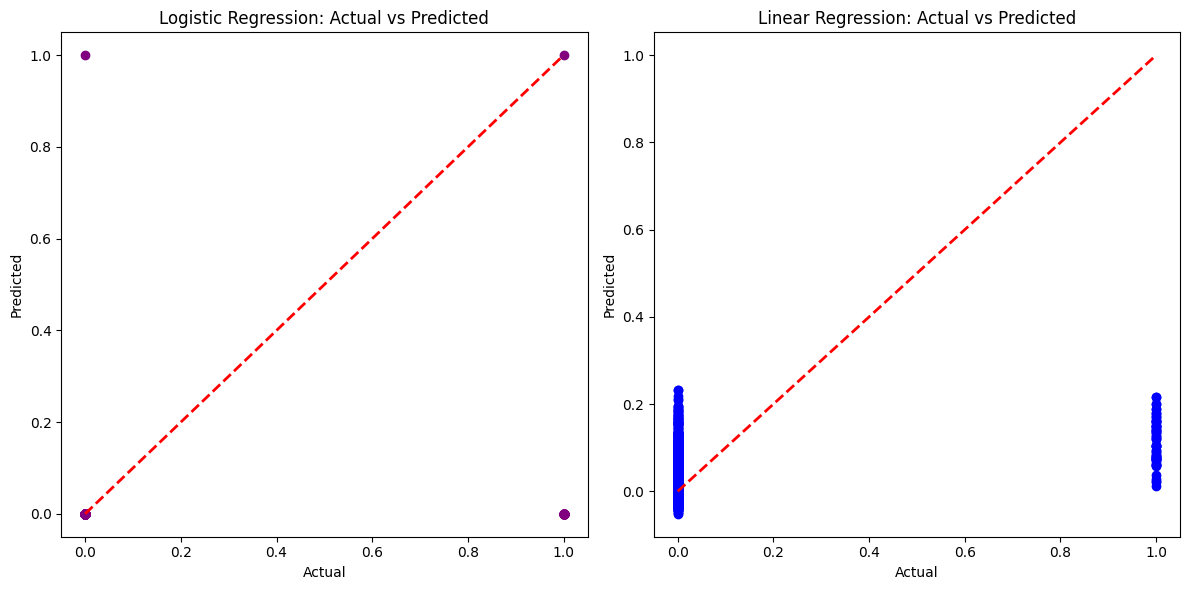

In [303]:
# Visualize the predicted vs actual values for Logistic Regression (Classification task)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, Logistic_pred, color='purple')
plt.plot([0, 1], [0, 1], 'r--', lw=2)  # Line representing perfect prediction (ideal case)
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Visualize the predicted vs actual values for Linear Regression (Regression task)
plt.subplot(1, 2, 2)
plt.scatter(y_test, linear_reg_predictions, color='blue')
plt.plot([0, 1], [0, 1], 'r--', lw=2)  # Line representing perfect prediction (ideal case)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# **Observations: Why Certain Models Have Good Accuracy and Others Don't**

The performance of each model varies due to the following reasons:

1. **Model Type and Purpose:**
   - **Linear Regression** is designed for continuous outcomes and may not work well for binary classification tasks like stroke prediction.
   - **Logistic Regression**, however, is specifically designed for classification tasks and works well for binary outcomes, making it the most suitable model for this problem.
   - **Ridge and Lasso Regression** use regularization techniques that prevent overfitting, making them potentially more robust than Linear Regression when dealing with noisy or high-dimensional data.

2. **Overfitting and Underfitting:**
   - **Regularization** in **Ridge** and **Lasso** helps prevent overfitting, improving generalization and performance on unseen data. This often results in better accuracy than **Linear Regression**, which is more prone to overfitting when the number of features is large or complex.

3. **Data Characteristics:**
   - Models like **Logistic Regression** tend to perform well when the data has a linear relationship with the target variable, as in this stroke prediction case. If the data has a more complex, non-linear structure, more advanced models would be required to achieve better performance.

4. **Feature Engineering:**
   - The preprocessing steps such as handling missing values, encoding categorical variables, and feature selection can significantly impact model performance. For example, **missing BMI values** were imputed with the median, and categorical variables were encoded into numeric formats.

5. **Class Imbalance:**
   - If the dataset has an imbalanced class distribution (e.g., more people did not have a stroke), models may show bias toward predicting the majority class. This can lead to higher accuracy but poor predictive performance for the minority class (stroke). In such cases, metrics like **precision**, **recall**, and **F1-score** should be considered.



#**Precision, Recall, F1 score and Accuracy score for Logistic Regression Model**

In [304]:
precision = precision_score(y_test, Logistic_pred)
recall = recall_score(y_test, Logistic_pred)
f1 = f1_score(y_test, Logistic_pred)
accuracy = accuracy_score(y_test, Logistic_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.50
Recall: 0.02
F1 Score: 0.03
Accuracy: 0.94


#**Generate the Confusion Matrix graph.**

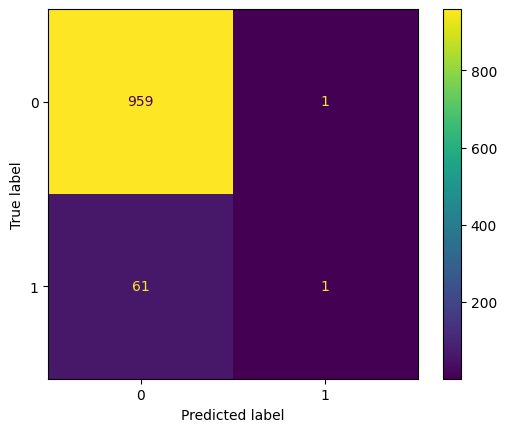

In [305]:
from sklearn import metrics

Confusion_matrix = metrics.confusion_matrix(y_test, Logistic_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [306]:
tp = Confusion_matrix[0][0]
fn = Confusion_matrix[0][1]
fp = Confusion_matrix[1][0]
tn = Confusion_matrix[1][1]

# **Precision Recall curve**

Text(0.5, 1.0, '2-class Precision-Recall curve')

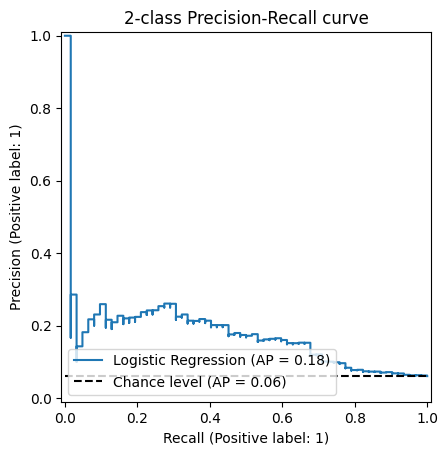

In [307]:
from sklearn.metrics import PrecisionRecallDisplay
clf=LogisticRegression()
clf.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Logistic Regression", plot_chance_level=True)
display.ax_.set_title("2-class Precision-Recall curve")

# **Ideal Percision recall graph**

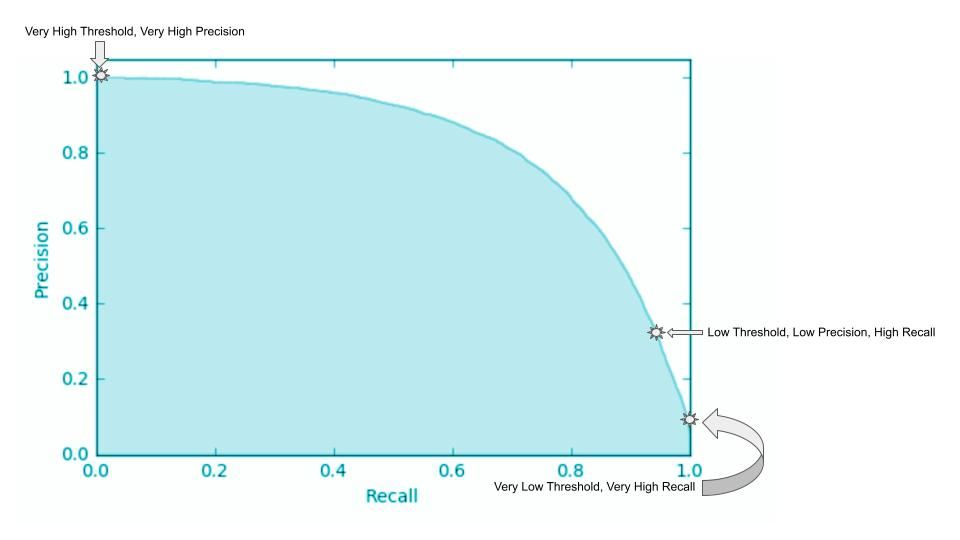

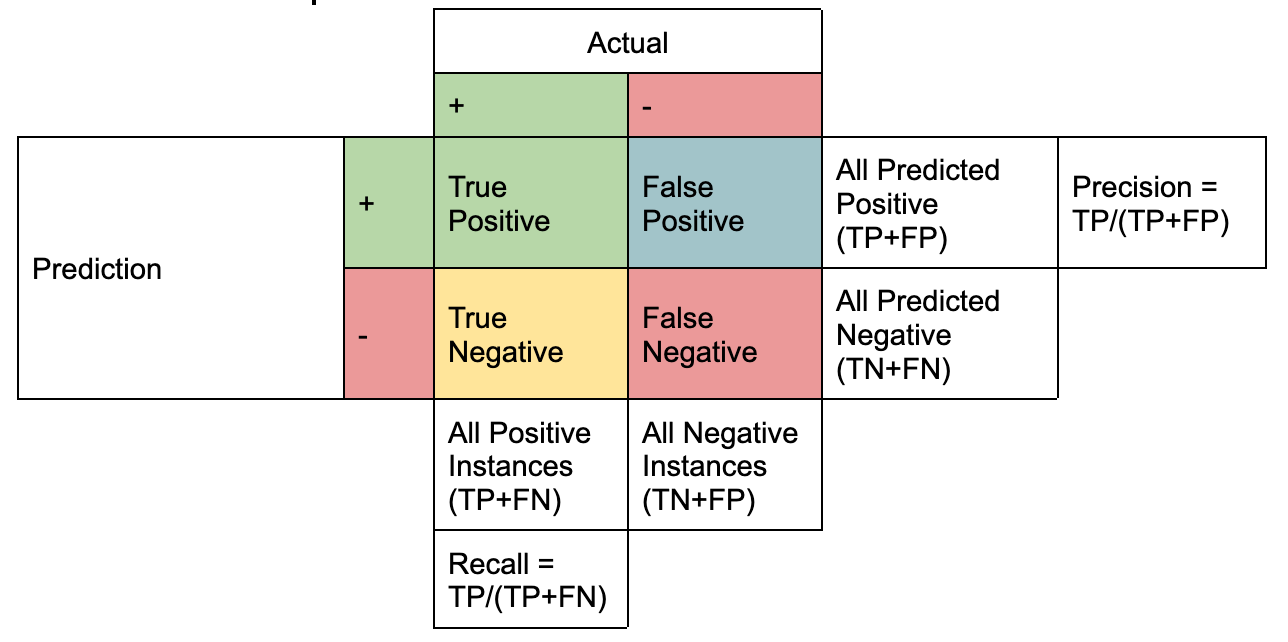

# **Decision Tree**


In [308]:
from sklearn import tree
model1=tree.DecisionTreeClassifier()
model1.fit(X_train, y_train)
tree_pred = model1.predict(X_test)
model1.score(X_test, y_test)

0.9090019569471625

In [309]:
f1_score(y_test, tree_pred)

0.1308411214953271

In [310]:
precision_score(y_test, tree_pred)

0.15555555555555556

In [311]:
recall_score(y_test,tree_pred)

0.11290322580645161

# **Performance Analysis:** Model performs well, and where it lacks
**Strengths:**
The model shows high accuracy and recall, indicating it correctly identifies most stroke cases (True Positives).

**Weaknesses:**
Precision might be lower, indicating some false positives. This means some non-stroke cases are incorrectly classified as strokes, which can lead to unnecessary interventions.

# **Dataset Bias:**
**Class Imbalance:**
If stroke cases are much fewer than non-stroke cases, the model might favor the majority class (non-stroke).

**Bias Detection:**
Check the distribution of the stroke column:

In [312]:
print(df['stroke'].value_counts(normalize=True))


stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


**Mitigation Strategies:**

1. **Resampling Techniques**: Use SMOTE to oversample the minority class or undersample the majority.
2. **Class Weights:** Adjust class weights in the logistic regression model

In [313]:
clf = LogisticRegression(class_weight='balanced')

# **Mathematical Breakdown with Formulas:**  
**Precision:**  
Formula:

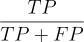  

Indicates how many of the predicted positive cases were correct.  

**Recall:**  
Formula:

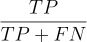

Measures how many actual positive cases were correctly identified.  

**F1 Score:**  
Formula:

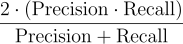

Harmonic mean of precision and recall to balance both metrics.  

**Accuracy:**  
Formula:

 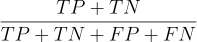

Shows the overall correctness of the model.  


# **Observations and Recommendations:**  
**Observations:**  
- The model achieves reasonable accuracy, but lower precision indicates a higher number of false positives.  
- High recall is essential in healthcare scenarios to minimize missed stroke cases (false negatives).  

**Recommendations:**  
1. **Threshold Adjustment:** Tune the decision threshold to balance precision and recall based on the healthcare context.  
2. **Data Balancing:** Apply techniques like SMOTE for oversampling the minority class or use class weights in model training to address class imbalance.  
3. **Feature Selection:** Perform feature engineering to improve the dataset's quality and make the model less biased.  
4. **Evaluation Metrics:** Use metrics like AUC-ROC or PR curves for imbalanced datasets to better evaluate model performance.  